https://www.kaggle.com/rgrajan/time-series-exploratory-data-analysis-forecast

# Import & Clean Data
Let us read the State Time Series data and do some basic analysis. The data is available from 2010 onwards, so let us remove the previous data from the data set.

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ciepielajan/Time_series/main/data/State_time_series.csv')
df.Date = pd.to_datetime(df.Date)
df = df[df['Date'] >= '01-01-2010']
df.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,...,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
8221,2010-01-31,Alabama,169.0,32616.0,29765.0,NaN,98.491968,93.097826,103.935698,110.909091,96.206908,NaN,NaN,94.076655,NaN,114900.0,144900.0,253950.0,399900.0,169900.0,NaN,142000.0,167500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,55.22,36.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2029.0,3320.0,NaN,91000.0,76900.0,123700.0,230100.0,334500.0,123800.0,67900.0,137300.0,123800.0,123300.0,232500.0,NaN,NaN,NaN,NaN,NaN
8222,2010-01-31,Alaska,130.0,3477.0,2748.0,182.03125,163.351878,154.224835,144.439421,125.418060,153.623950,154.224835,119.007937,151.328940,113000.0,169900.0,235500.0,315000.0,399000.0,239900.0,204500.0,350000.0,259900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130500.0,177800.0,253600.0,322400.0,420700.0,247200.0,177200.0,176100.0,247200.0,257100.0,356200.0,NaN,NaN,NaN,NaN,NaN
8223,2010-01-31,Arizona,112.0,50221.0,50480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,91.85,5.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8467.0,12039.0,135000.0,96100.0,141300.0,151500.0,204000.0,311900.0,161300.0,95700.0,121800.0,161300.0,168600.0,298400.0,NaN,NaN,NaN,NaN,NaN
8224,2010-01-31,Arkansas,121.0,18475.0,17418.0,NaN,81.407259,86.213992,94.743421,96.915394,88.66

# Exploratory Data Analysis (EDA)
Let us explore statewise data. Whether there is any trend for a specific state or what are the top 5 states?

## Top 7 States of Median Price Per Sqft
This is the top 7 states of Median Listring Price per Sqft All Homes

In [2]:
dfallhomes = df.groupby('RegionName', as_index=False)['MedianListingPricePerSqft_AllHomes'].\
    mean().dropna().sort_values('MedianListingPricePerSqft_AllHomes', ascending=False)
dfallhomes.head(7)

,RegionName,MedianListingPricePerSqft_AllHomes
8,DistrictofColumbia,419.877656
11,Hawaii,411.151159
4,California,267.604879
21,Massachusetts,206.089033
32,NewYork,172.164916
5,Colorado,171.806359
39,RhodeIsland,171.634579


## Bottom 5 states of Median Listing Price per Sqft All Homes
List the bottom 5 states from the results

In [3]:
dfallhomes.tail(5)

,RegionName,MedianListingPricePerSqft_AllHomes
36,Oklahoma,87.962777
35,Ohio,87.603817
3,Arkansas,87.407146
24,Mississippi,84.713327
14,Indiana,82.119263


## Trend in State Time Series
The most important EDA on time series data is to identify trend, seasonality & correlation. Let us check whether there is any trend in the data with the Top state data.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


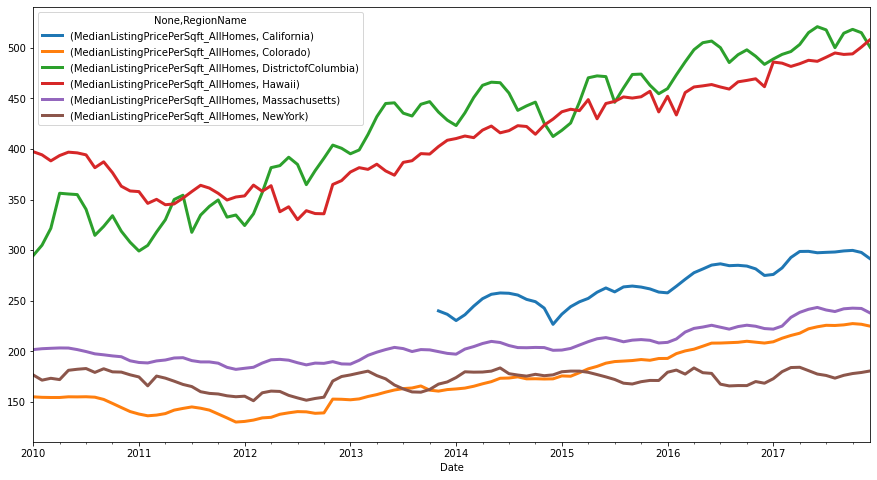

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
statelist = ['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'NewYork', 'Colorado']
stateseries = pd.DataFrame(df[(df['RegionName'].\
    isin(statelist))][['Date','RegionName','MedianListingPricePerSqft_AllHomes']].\
    dropna().\
    groupby(['Date', 'RegionName'])['RegionName','MedianListingPricePerSqft_AllHomes'].mean().unstack())
stateseries.plot(figsize=(15,8), linewidth=3)
plt.show()

from the above graph, we can see that
1. There are trends for Hawaii & District of Columbia, even though it is up & down but there is a strong upward trend on these two states. This also shows that there is a seasonality in the trends. But the investment is costly in these two states.
2. There is no point in investing the homes in New York, it's almost stationary.
3. The similar trend of top 2 states is reflecting in Colorado also. This seems to be the best investment for homes as it is steadily increasing over the years among the top 5.

## Seasonality in trends
Let us check whether there is any seasonality in the trends. This is important for the predictions.

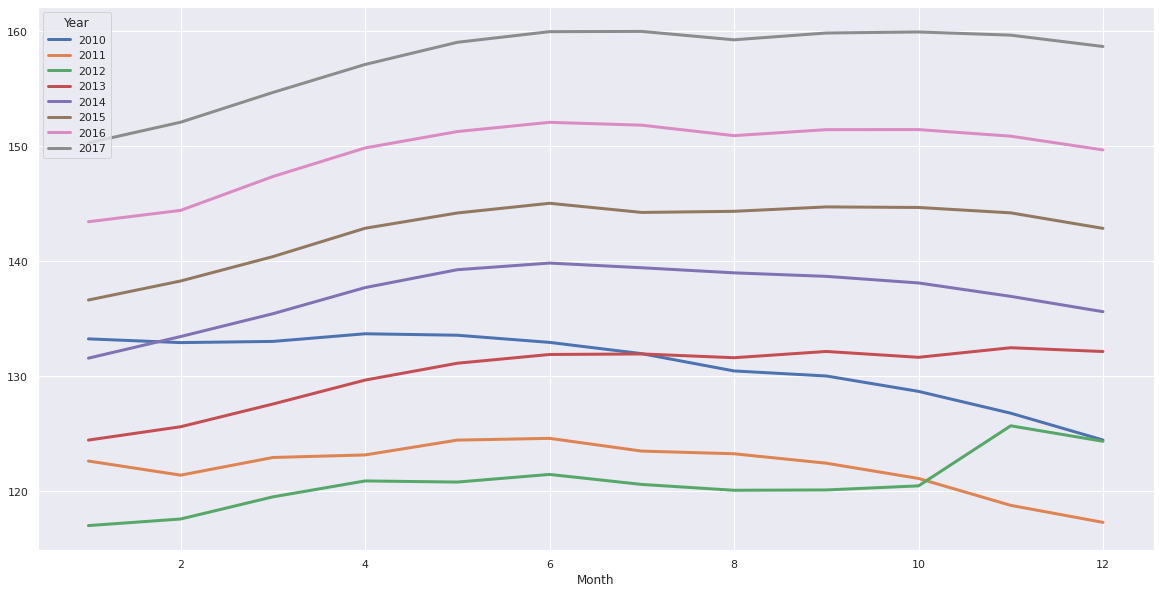

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
season = df
season['Date'] = df.Date
season['Year'] = df['Date'].dt.year
season['Month'] = df['Date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'MedianListingPricePerSqft_AllHomes', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

from above graph, we can see that
1. The price start decreasing in year 2010 and continued till 2012. The price in year 2013 is almost equivalent to 2010.
2. The best time to sell the house in a year is from June to October. The price is peak in these months consistently in all the years even during the down trend. Alternatively the best time to buy the house is in December & January.
3. The price drops may be due to holiday season or some other reason is a problem for us to solve another day.

## Correlation
I always have a doubt whether various bedroom types have any relation during the trends. Let's find out.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


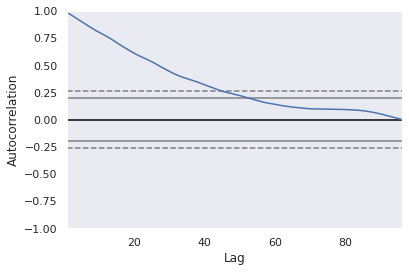

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

brtypes = df.groupby('Date')['Date','MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom','MedianListingPricePerSqft_3Bedroom','MedianListingPricePerSqft_4Bedroom','MedianListingPricePerSqft_5BedroomOrMore'].\
    mean().dropna()
pd.plotting.autocorrelation_plot(brtypes);
plt.show()

The above graph shows there is a positive correlation for all the bedroom types, but still it is not clear how each bedroom types are correlated. Let us find out.

In [7]:
brtypes.corr()

,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore
MedianListingPricePerSqft_1Bedroom,1.000000,0.883615,0.849076,0.791843,0.764136
MedianListingPricePerSqft_2Bedroom,0.883615,1.000000,0.995141,0.980522,0.970396
MedianListingPricePerSqft_3Bedroom,0.849076,0.995141,1.000000,0.993460,0.983871
MedianListingPricePerSqft_4Bedroom,0.791843,0.980522,0.993460,1.000000,0.995297
MedianListingPricePerSqft_5BedroomOrMore,0.764136,0.970396,0.983871,0.995297,1.000000


The above table confirms the correlation and to be more specific let us remove the seasonality from the data and see. This is called order of correlation.

In [8]:
brtypes.diff().corr()

,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore
MedianListingPricePerSqft_1Bedroom,1.000000,0.642393,0.684201,0.626586,0.554135
MedianListingPricePerSqft_2Bedroom,0.642393,1.000000,0.936778,0.915764,0.872590
MedianListingPricePerSqft_3Bedroom,0.684201,0.936778,1.000000,0.951700,0.878844
MedianListingPricePerSqft_4Bedroom,0.626586,0.915764,0.951700,1.000000,0.910294
MedianListingPricePerSqft_5BedroomOrMore,0.554135,0.872590,0.878844,0.910294,1.000000


First order difference in correlation still has better correlation between bedroom types. You can see 1 Bedroom & 2 Bedroom are highly correlated than 1 bedroom & 5 bedroom. 

# Forecast
We will do the forecast with Median Listing price per sq ft All Homes. Let us see the trend first.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


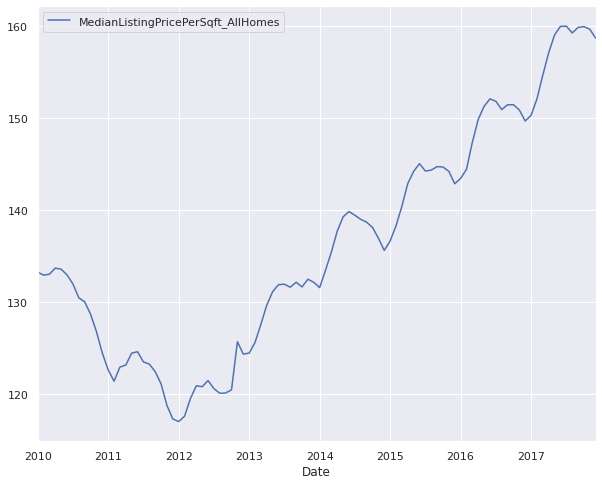

In [9]:
allhomes = df.groupby('Date')['Date','MedianListingPricePerSqft_AllHomes'].mean().dropna()
allhomes.plot(figsize=(10,8))
plt.show()

In the above graph, you can see the clear trend but also there are seasonality in the trend. The forecast for the time series should be stationary otherwise the predictions may not correct.

## ARIMA forecast model
One of the common model used to forecast time series data is ARIMA. It stands for Autoregressive integrated moving average. One of the parameters are p, d & q.  As you know the data has seasonality and let us use Seasonal ARIMA, SARIMAX to forecast the mode. 
There is a separate process to to identify the optmimum parameters, I did a grid search on GPU machine and it stopped after 700+ iterations. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


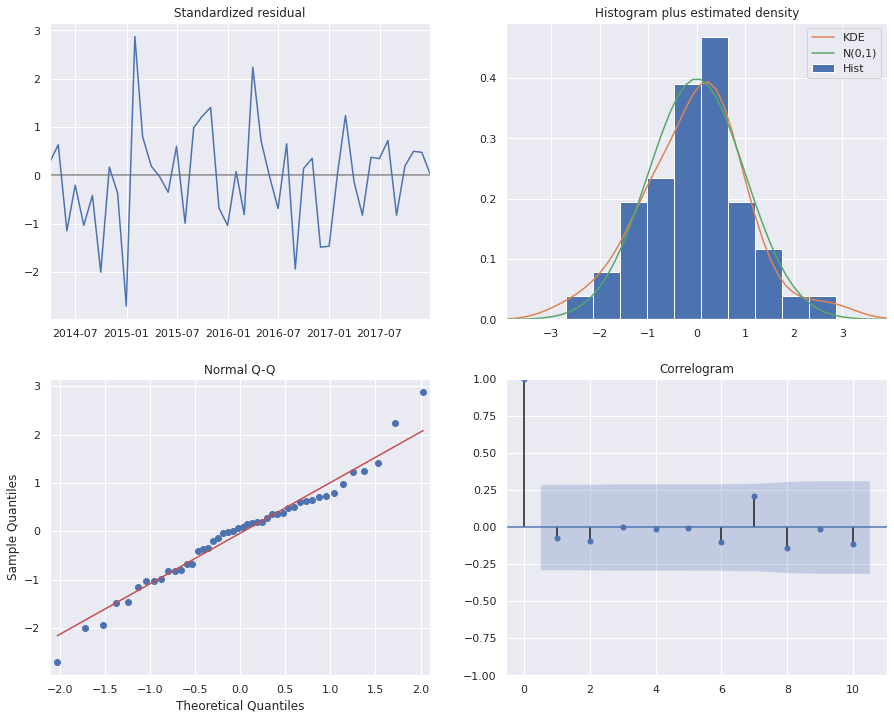

In [10]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
mod = sm.tsa.statespace.SARIMAX(allhomes,
                                    order = (2, 0, 4),
                                    seasonal_order = (3, 1, 2, 12),
                                    enforce_stationarity = False,
                                    enforce_invertibility = False)
results = mod.fit()
results.plot_diagnostics(figsize=(15,12))
plt.show()

From the above graph, we can see that
1. The histogram has minor difference with KDE
2. Linear regression can be improved
3. There are still positive correlation, this can be optimized further.

## Validate the Model
Let us validate the model by Train Test & Split.

In [ ]:
train_size = int(len(allhomes) * 0.60)
train, test = allhomes[0:train_size], allhomes[train_size:]

pred = results.get_prediction(start = test.iloc(train_size)[0].name, dynamic = False)
pred_ci = pred.conf_int()

ax = allhomes.plot(label='actual', figsize=(10,8))
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7, color='red')
plt.legend()
plt.show()

The predictions above is not perfect but it is still better compare to other parameters. Let us see the Mean Squared Error of the model.

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, pred.predicted_mean)
print('MSE {}'.format(error))

The mean squared error is 0.170, so it means the forecast can be till improved. Now let us predict for the future.

In [ ]:
pred_uc = results.get_forecast(steps=24)

pred_ci = pred_uc.conf_int()

ax = allhomes.plot(label = 'Actual', figsize=(15,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecasted')
ax.fill_between(pred_ci.index,
                   pred_ci.iloc[:,0],
                   pred_ci.iloc[:,1],
                   color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('MedianListingPricePerSqft_AllHomes')
plt.legend()
plt.show()

In the above graph you can see the forecast for next 24 months and the confidence interval is also better and not too much variance.